# HOG with Caltech-101

In [1]:
from imutils import paths
from scipy.io import loadmat
from skimage import io

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import logging
import dlib
import cv2
import os

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
IMAGES = "../dataset/101_ObjectCategories/Images"
ANNOTATIONS = "../dataset/101_ObjectCategories/Annotations"
CLASS_NAME = "cup"
OUTPUT_DIR = "../model"

In [3]:
images = []
boxes = []

for imagePath in paths.list_images(os.path.join(IMAGES, CLASS_NAME)):
    # read images
    images.append(io.imread(imagePath))
    
    # load corresponding annotations 
    imageID = imagePath[imagePath.rfind("/") + 1:].split("_")[1]
    imageID = imageID.replace(".jpg", "")
    
    annotationPath = "{}/{}/annotation_{}.mat".format(
        ANNOTATIONS, CLASS_NAME, imageID)
    
    annotations = loadmat(annotationPath)["box_coord"]

    # save the bounding boxex
    for (y, h, x, w) in annotations:
        boundingBox = [dlib.rectangle(
                                left=int(x), 
                                top=int(y), 
                                right=int(w), 
                                bottom=int(h))]
        boxes.append(boundingBox)

[rectangle(13,64,152,208)]


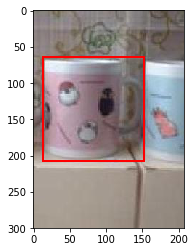

In [4]:
# check the image and the bounding box
# boxes can't be un packed ??
n = 12
print(boxes[n])

plt.imshow(images[n])
ax = plt.gca()
rect = Rectangle((13, 64), 139, 144, linewidth=2,
                 edgecolor='r',facecolor='none')
ax.add_patch(rect)

## Train HOG detector

In [5]:
logging.info("training detector...")

options = dlib.simple_object_detector_training_options()
detector = dlib.train_simple_object_detector(images, boxes, options)
 
logging.info("saving classifier to file...")
if not os.path.isdir(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
modelName = "{}/{}_{}".format(OUTPUT_DIR, CLASS_NAME,"HOG.bin")  
detector.save(modelName)


INFO:root:training detector...
INFO:root:saving classifier to file...


In [6]:
# display the histogram of oriented gradients
win = dlib.image_window()
win.set_image(detector)
dlib.hit_enter_to_continue()

## Test HOG detector

In [8]:
from time import time
detector = dlib.simple_object_detector(modelName)

testingPathes = os.path.join(IMAGES, CLASS_NAME)

for ii, testingPath in enumerate(paths.list_images(testingPathes)):
    image = cv2.imread(testingPath)
    boxes = detector(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    print("#{}, box:{}".format(ii, boxes))
    
    for b in boxes:
        (x, y, w, h) = (b.left(), b.top(), b.right(), b.bottom())
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)

    cv2.imshow("Image", image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

#0, box:rectangles[]
#1, box:rectangles[[(42, 42) (281, 233)]]
#2, box:rectangles[]
#3, box:rectangles[]
#4, box:rectangles[[(42, 90) (281, 281)]]
#5, box:rectangles[]
#6, box:rectangles[]
#7, box:rectangles[[(22, 50) (308, 280)]]
#8, box:rectangles[]
#9, box:rectangles[[(12, 78) (178, 211)]]
#10, box:rectangles[[(74, 35) (273, 194)]]
#11, box:rectangles[[(74, 94) (273, 254)]]
#12, box:rectangles[]
#13, box:rectangles[[(22, 50) (308, 280)]]
#14, box:rectangles[]
#15, box:rectangles[[(42, 42) (281, 233)]]
#16, box:rectangles[[(22, 50) (308, 280)]]
#17, box:rectangles[[(22, 22) (308, 251)]]
#18, box:rectangles[[(22, 50) (308, 280)]]
#19, box:rectangles[[(42, 18) (281, 209)]]
#20, box:rectangles[[(42, 42) (281, 233)]]
#21, box:rectangles[[(18, 42) (257, 233)]]
#22, box:rectangles[[(22, 22) (308, 251)]]
#23, box:rectangles[[(42, 18) (281, 209)]]
#24, box:rectangles[[(42, 18) (281, 209)]]
#25, box:rectangles[]
#26, box:rectangles[[(22, 22) (308, 251)]]
#27, box:rectangles[[(42, 42) (281, 23